# A few Basic Gates

In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

## About X gate

In [2]:
qc1 = QuantumCircuit(1, 1)

What an X gate does, is that it flips the state of the Qubit.
i.e. If it is |0> it converts it to |1>. If it is |1> it converts it to |0>

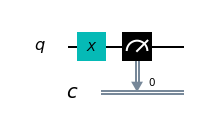

In [3]:
qc1.x(0)
qc1.measure(0, 0)
qc1.draw(output='mpl')

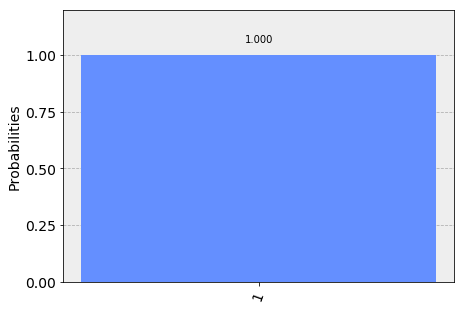

In [4]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc1, backend=simulator, shots=1024).result()
counts = result.get_counts()
plot_histogram(counts)

As you can see, the state is now |1>.
Let us try to convert it back to |0> by applying another X Gate.

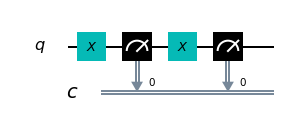

In [5]:
qc1.x(0)
qc1.measure(0, 0)
qc1.draw(output='mpl')

Since we applied an X gate, the state should be flipped back to |0>

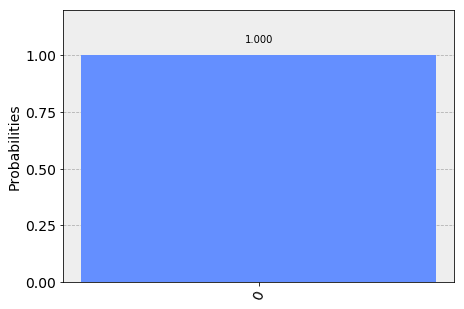

In [6]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc1, backend=simulator, shots=1024).result()
counts = result.get_counts()
plot_histogram(counts)

Great! It works.
We can conclude that an X gate does the following
      
|0>--|X|--|1>   
|1>--|X|--|0>  

## About H gate

Hadamard gate a.k.a H gate, is one of the most used Quantum Gates.
Its function is to arrange the specific qubit into a superposition of states |0> and |1>.
When measured it has a 50% chance of ending up in either state |0> or |1>.

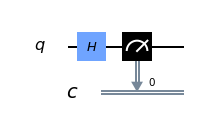

In [7]:
qc2 = QuantumCircuit(1, 1)
qc2.h(0)
qc2.measure(0, 0)
qc2.draw(output='mpl')

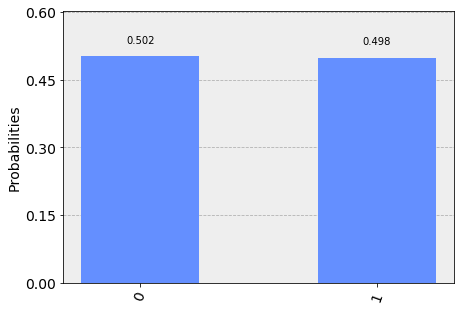

In [8]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc2, backend=simulator, shots=1024).result()
counts = result.get_counts()
plot_histogram(counts)

As expected we get approximately 50% of both states |0> and |1>.
Which is exactly what we expected

## About CNOT Gate

A Controlled-Not gate a.k.a CNOT gate is a two-qubit gate, involving a control as well as a target qubit.
When the contol qubit is in state |0> the target qubit's state remains unchanged.
If the qubit is in state |1>, an X gate is applied on the target qubit.

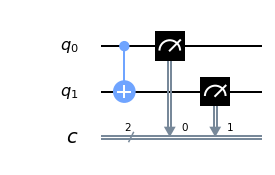

In [9]:
qc3_case1 = QuantumCircuit(2, 2)
qc3_case1.cx(0, 1)
qc3_case1.measure([0, 1], [0, 1])
qc3_case1.draw(output='mpl')

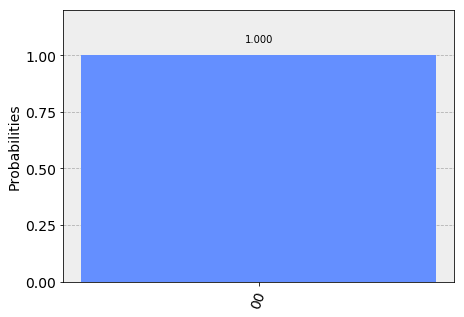

In [10]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc3_case1, backend=simulator, shots=1024).result()
counts = result.get_counts()
plot_histogram(counts)

In this case we get |00> when cnot is applied on |00>, as it remains unchanged, due to the target qubit being |0>.

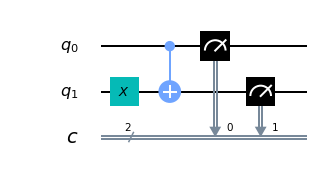

In [11]:
qc3_case2 = QuantumCircuit(2, 2)
qc3_case2.x(1)
qc3_case2.cx(0, 1)
qc3_case2.measure([0, 1], [0, 1])
qc3_case2.draw(output='mpl')

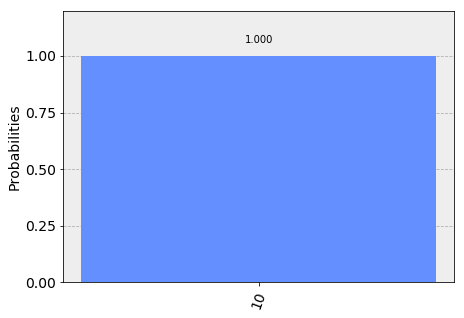

In [12]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc3_case2, backend=simulator, shots=1024).result()
counts = result.get_counts()
plot_histogram(counts)

### Important point to note: 
When a qubit is measured it's resulting state, is measured such that the last qubit is written first.

In this case, the target qubit's state is |1>, and control qubit's state is |0>
Since the control qubit = |0>
The target qubit's state remains unchanged i.e. it stays |1>

Because the state is measured the other way around, the resulting state is |10>

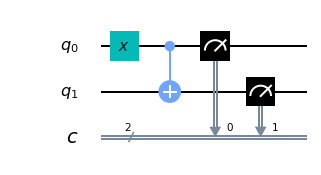

In [13]:
qc3_case3 = QuantumCircuit(2, 2)
qc3_case3.x(0)
qc3_case3.cx(0, 1)
qc3_case3.measure([0, 1], [0, 1])
qc3_case3.draw(output='mpl')

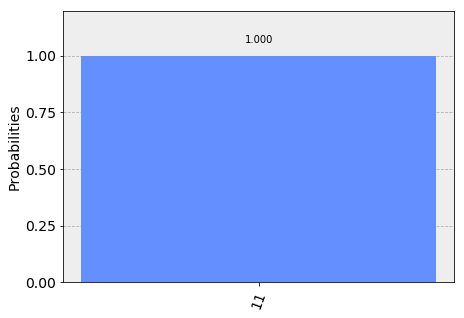

In [15]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc3_case3, backend=simulator, shots=1024).result()
counts = result.get_counts()
plot_histogram(counts)

In this case, the target qubit's state is |0>, and control qubit's state is |1> Since the control qubit = |1> an X gate is applied on target qubit = |0>. Therefore flipping the state to |1>.
The final result |11> is exactly what we expect.

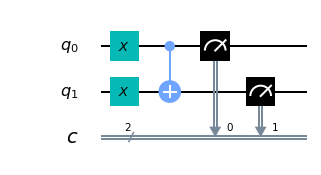

In [16]:
qc3_case4 = QuantumCircuit(2, 2)
qc3_case4.x(0)
qc3_case4.x(1)
qc3_case4.cx(0, 1)
qc3_case4.measure([0, 1], [0, 1])
qc3_case4.draw(output='mpl')

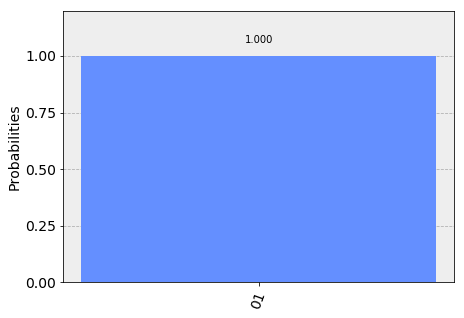

In [17]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc3_case4, backend=simulator, shots=1024).result()
counts = result.get_counts()
plot_histogram(counts)

In this case, the target qubit's state is |1>, and control qubit's state is |1> Since the control qubit = |1> an X gate is applied on target qubit = |1>. 
Therefore flipping the state to |0>. 
The final result |01> is exactly what we expect.

## Entanglement

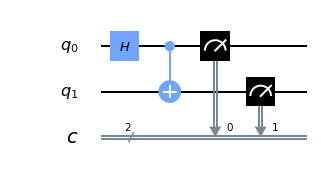

In [18]:
entanglement_circ = QuantumCircuit(2, 2)
entanglement_circ.h(0)
entanglement_circ.cx(0, 1)
entanglement_circ.measure([0, 1], [0, 1])
entanglement_circ.draw(output='mpl')

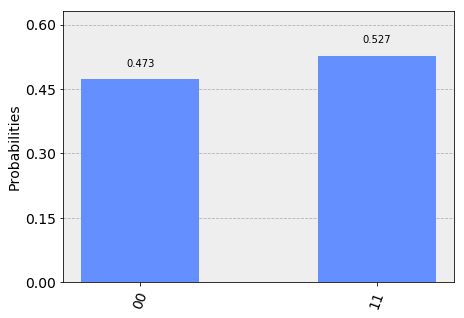

In [19]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(entanglement_circ, backend=simulator, shots=1024).result()
counts = result.get_counts()
plot_histogram(counts)

As you can see, if the control qubit = |0> (50%),
the target qubit remains |0>,
thus resulting in |00>.

If the control qubit = |1> (50%),
the target qubit flips to |1>,
thus resulting in |11>.

In [20]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright